## Notebook for publication ready plots for the thesis

In [1]:
from stareg.star_model import StarModel

In [2]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

In [3]:
np.random.seed(1)
x = np.linspace(0,1,400)
y_true = 3*np.sin(3*np.pi*x) + 16*x + 5
y = y_true + np.random.normal(loc=0, scale=2.6, size=len(x))
df = pd.DataFrame(data={"x":x, "y":y, "y_true":y_true})

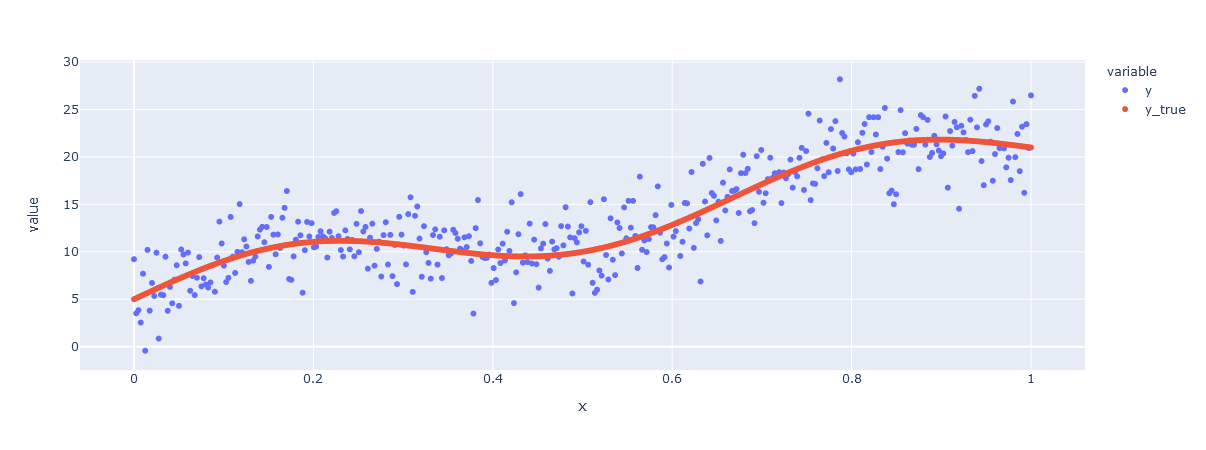

In [4]:
px.scatter(data_frame=df, x="x", y=["y", "y_true"])

In [5]:
m_smooth = (("s(1)", "none", 15, (0, 0), "equidistant"),)
m_wiggly = (("s(1)", "none", 50, (0, 0), "equidistant"),)
m_p = (("s(1)", "none", 50, (100, 0), "equidistant"),)


In [6]:
M_smooth = StarModel(description=m_smooth)
M_wiggly = StarModel(description=m_wiggly)
M_p = StarModel(description=m_p)

In [7]:
M_smooth.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)
M_wiggly.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)
M_p.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)

ypred_s = M_smooth.basis @ M_smooth.coef_
ypred_w = M_wiggly.basis @ M_wiggly.coef_
ypred_p = M_wiggly.basis @ M_wiggly.coef_

df_fit = pd.DataFrame(data={"fit_s":M_smooth.basis @ M_smooth.coef_, "fit_w":M_wiggly.basis @ M_wiggly.coef_, "fit_p": M_p.basis @ M_p.coef_})

dfp = pd.concat([df, df_fit], axis=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


**Plot B-spline fit and basis functions**

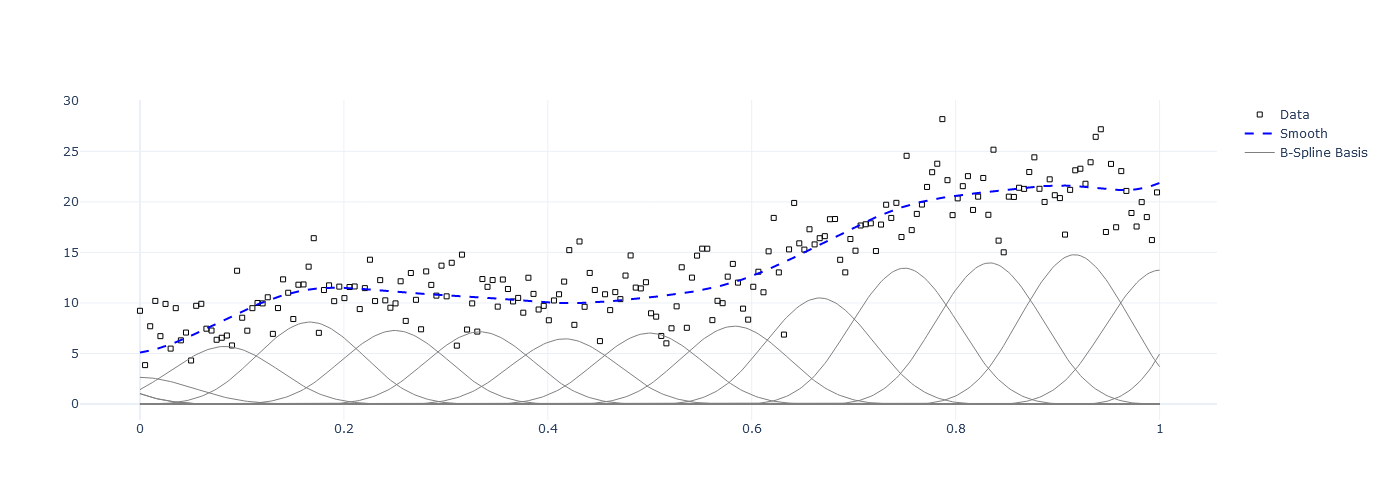

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dfp["x"][::2], y=dfp["y"][::2], mode="markers", marker=dict(size=5, symbol=101, color="black"), name="Data"))
fig.add_trace(go.Scatter(x=dfp["x"], y=dfp["fit_s"], mode="lines", line=dict(width=2, color="blue", dash="dash"), name="Smooth"))

for i in range(M_smooth.basis.shape[1]):
    fig.add_trace(go.Scatter(x=dfp["x"], y=M_smooth.basis[:,i]*M_smooth.coef_[i], mode="lines", line=dict(width=1, color="grey"), showlegend=False))
    if i == 0:
        fig.add_trace(go.Scatter(x=dfp["x"], y=M_smooth.basis[:,i]*M_smooth.coef_[i], mode="lines", line=dict(width=1, color="grey"), name="B-Spline Basis", showlegend=True))
fig.layout.template = "plotly_white"
fig.layout.height = 500
fig.layout.width = 1000
#fig.write_image("img/thesis/smooth_plus_basis.pdf", width=1920, height=1020)
fig.show()

**Plot low and high number of splines**

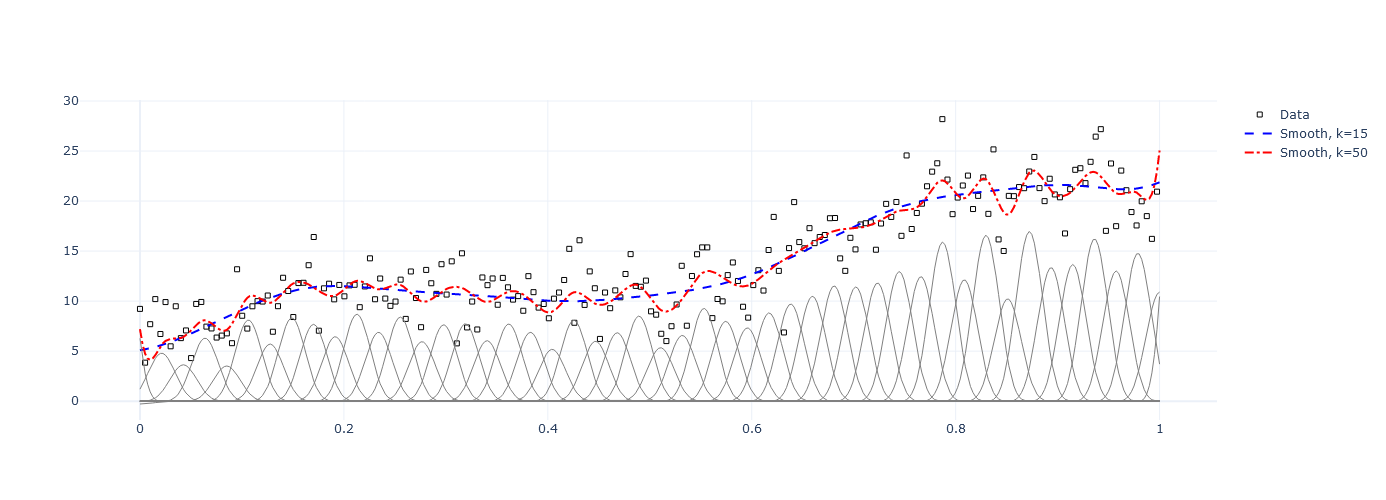

In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dfp["x"][::2], y=dfp["y"][::2], mode="markers", marker=dict(size=5, symbol=101, color="black"), name="Data"))
fig.add_trace(go.Scatter(x=dfp["x"], y=dfp["fit_s"], mode="lines", line=dict(width=2, color="blue", dash="dash"), name="Smooth, k=15"))
fig.add_trace(go.Scatter(x=dfp["x"], y=dfp["fit_w"], mode="lines", line=dict(width=2, color="red", dash="dashdot"), name="Smooth, k=50"))

for i in range(M_wiggly.basis.shape[1]):
    fig.add_trace(go.Scatter(x=dfp["x"], y=M_wiggly.basis[:,i]*M_wiggly.coef_[i], mode="lines", line=dict(width=1, color="grey"), showlegend=False))
    
fig.layout.template = "plotly_white"
fig.layout.height = 500
fig.layout.width = 1000
#fig.write_image("img/thesis/smooth_wiggly_plus_basis.pdf", width=1920, height=1020)
fig.show()

**Plot P-splines for several $\lambda_s$ values**

In [11]:
m_p_m2 = (("s(1)", "none", 50, (10**-2, 0), "equidistant"),)
m_p_0 = (("s(1)", "none", 50, (10**0, 0), "equidistant"),)
m_p_2 = (("s(1)", "none", 50, (10**2, 0), "equidistant"),)
m_p_4 = (("s(1)", "none", 50, (10**4, 0), "equidistant"),)
m_p_6 = (("s(1)", "none", 50, (10**6, 0), "equidistant"),)
m_p_8 = (("s(1)", "none", 50, (10**8, 0), "equidistant"),) 


M_p_m2 = StarModel(description=m_p_m2).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_0 = StarModel(description=m_p_0).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_2 = StarModel(description=m_p_2).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_4 = StarModel(description=m_p_4).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_6 = StarModel(description=m_p_6).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_8 = StarModel(description=m_p_8).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)

ypred_p_m2 = M_p_m2.basis @ M_p_m2.coef_
ypred_p_0 = M_p_0.basis @ M_p_0.coef_
ypred_p_2 = M_p_2.basis @ M_p_2.coef_
ypred_p_4 = M_p_4.basis @ M_p_4.coef_
ypred_p_6 = M_p_6.basis @ M_p_6.coef_
ypred_p_8 = M_p_8.basis @ M_p_8.coef_

df_ps = pd.DataFrame(data={"x":x, "y":y, "yp_m2":ypred_p_m2, "yp_0":ypred_p_0, "yp_2":ypred_p_2, "yp_4":ypred_p_4, "yp_6":ypred_p_6, "yp_8":ypred_p_8 })

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


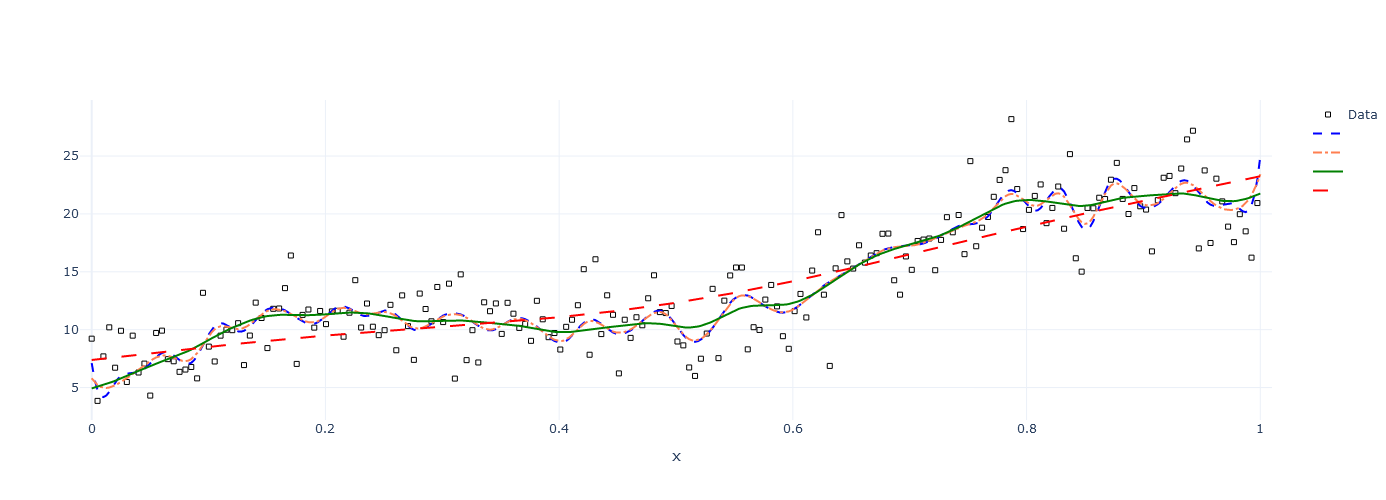

In [12]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ps["x"][::2], y=df_ps["y"][::2], mode="markers", marker=dict(size=5, symbol=101, color="black"), name="Data"))
fig.add_trace(go.Scatter(x=df_ps["x"], y=df_ps["yp_m2"], mode="lines", line=dict(width=2, color="blue", dash="dash"), name=r"$\lambda_s = 10^{-2}$"))
fig.add_trace(go.Scatter(x=df_ps["x"], y=df_ps["yp_0"], mode="lines", line=dict(width=2, color="coral", dash="dashdot"), name=r"$\lambda_s = 10^{0}$"))
fig.add_trace(go.Scatter(x=df_ps["x"], y=df_ps["yp_2"], mode="lines", line=dict(width=2, color="green", dash="solid"), name=r"$\lambda_s = 10^{2}$"))
#fig.add_trace(go.Scatter(x=df_ps["x"], y=df_ps["yp_4"], mode="lines", line=dict(width=2, color="blue"), name=r"$\lambda_s = 10^{4}$"))
fig.add_trace(go.Scatter(x=df_ps["x"], y=df_ps["yp_6"], mode="lines", line=dict(width=2, color="red", dash="longdash"), name=r"$\lambda_s = 10^{6}$"))
#qfig.add_trace(go.Scatter(x=df_ps["x"], y=df_ps["yp_8"], mode="lines", line=dict(width=2, color="palevioletred"), name=r"$\lambda_s = 10^{8}$"))

fig.update_xaxes(title_text="x", range=[-0.01, 1.01])
fig.layout.template = "plotly_white"
fig.layout.height = 500
fig.layout.width = 1000
fig.show()

fname = "img/thesis/p_splines.pdf"
#pio.write_image(fig, fname, width=1920, height=1080, )


**Monotonicity constraint fit**

In [14]:
m_base = (("s(1)", "none", 30, (0.1, 0), "equidistant"),)
m_c = (("s(1)", "inc", 30, (0.1, 6000), "equidistant"),)

Mbase = StarModel(description=m_base).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0)
Mcon = StarModel(description=m_c).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0)

ypred_b = Mbase.basis @ Mbase.coef_
ypred_c = Mcon.basis @ Mcon.coef_

df_c = pd.concat((df, pd.DataFrame(data={"yp_b":ypred_b, "yp_c":ypred_c})), axis=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


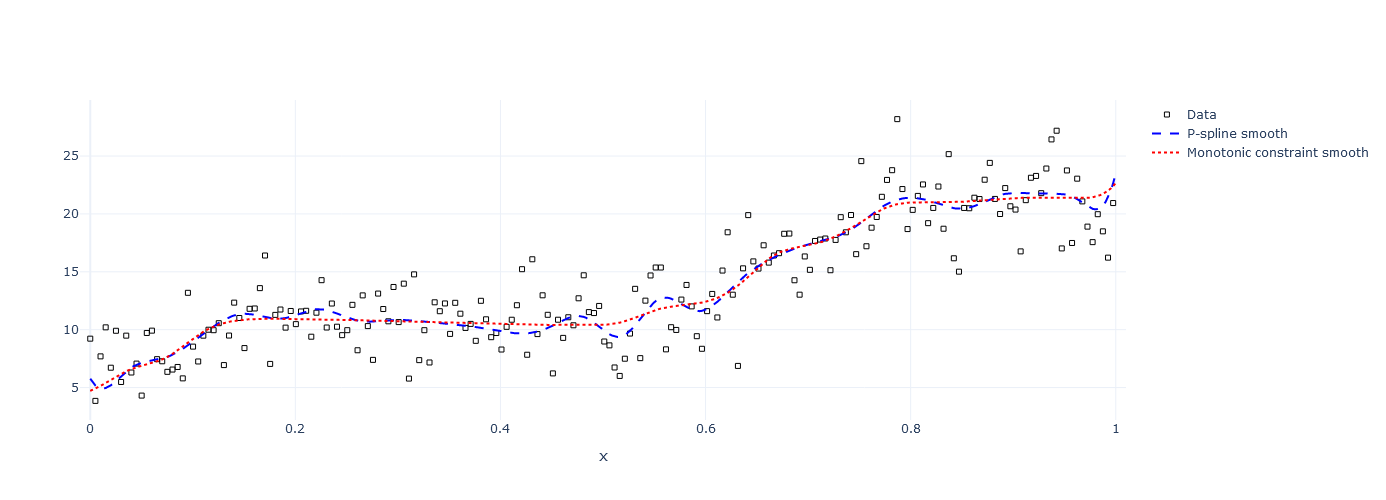

In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_c["x"][::2], y=df_c["y"][::2], mode="markers", marker=dict(size=5, symbol=101, color="black"), name="Data"))
fig.add_trace(go.Scatter(x=df_c["x"], y=df_c["yp_b"], mode="lines", line=dict(width=2, color="blue", dash="dash"), name="P-spline smooth"))
fig.add_trace(go.Scatter(x=df_c["x"], y=df_c["yp_c"], mode="lines", line=dict(width=2, color="red", dash="dot"), name="Monotonic constraint smooth"))


fig.update_xaxes(title_text="x", range=[-0.01, 1.01])
fig.layout.template = "plotly_white"
fig.layout.height = 500
fig.layout.width = 1000
fig.show()

#fname = "img/thesis/inc_spline.pdf"
#pio.write_image(fig, fname, width=1920, height=1080, )


**Random Stuff**

In [29]:
p = 10
T = np.zeros((p,p))

In [30]:
for i in range(p-1):
    for j in range(p):
        if j > i:
            T[i,j] = 10

In [32]:
T

array([[ 0., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [ 0.,  0., 10., 10., 10., 10., 10., 10., 10., 10.],
       [ 0.,  0.,  0., 10., 10., 10., 10., 10., 10., 10.],
       [ 0.,  0.,  0.,  0., 10., 10., 10., 10., 10., 10.],
       [ 0.,  0.,  0.,  0.,  0., 10., 10., 10., 10., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 10., 10., 10., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [81]:
test_inc = np.linspace(0,1,10)
test_dec = np.linspace(1,0,10)

In [85]:
check_constraint(test_dec, "inc", smooth_type=type(M_conv.smooths["s(1)"]))

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [87]:
test_inc.T @ P.d1_difference_matrix(10).T @ check_constraint(test_inc, "dec", smooth_type=type(M_conv.smooths["s(1)"])) @ P.d1_difference_matrix(10) @ test_inc

0.1111111111111111

In [88]:
test_inc.T @ (-1*P.d1_difference_matrix(10).T) @ check_constraint(test_inc, "dec", smooth_type=type(M_conv.smooths["s(1)"])) @ (-1*P.d1_difference_matrix(10)) @ test_inc

0.1111111111111111

In [1]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from stareg.star_model import StarModel

## **INCREASING EXAMPLE**


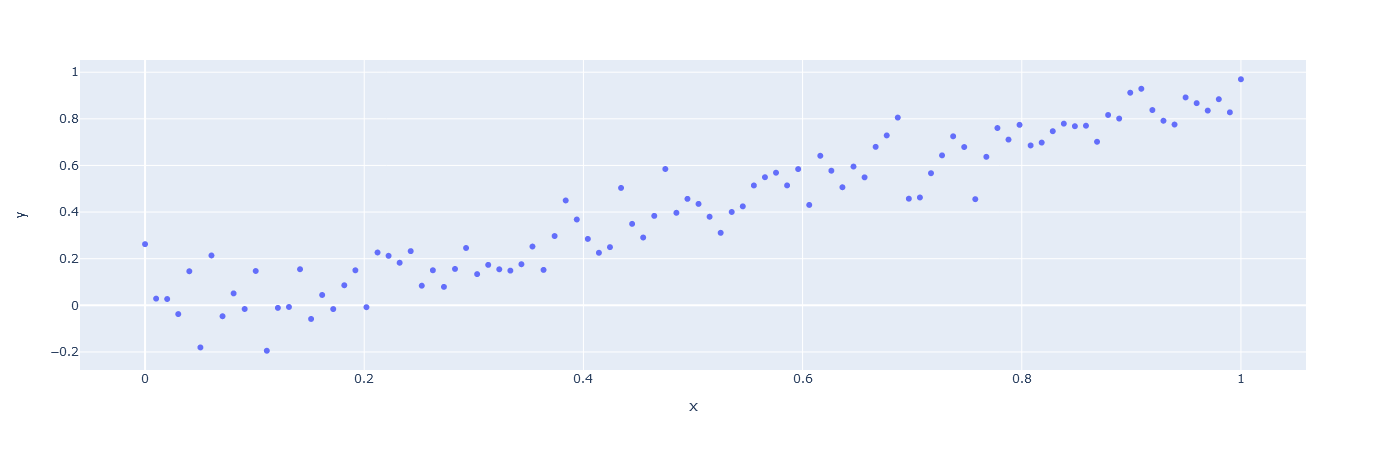

In [2]:
np.random.seed(1)
x = np.linspace(0,1,100)
xtest = np.linspace(0,1,1000)
y =  np.abs(x-0.1) + np.random.normal(scale=0.1, size=len(x))
px.scatter(x=x, y=y)

In [23]:
m = (("s(1)", "inc", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [24]:
minc = (("s(1)", "inc", 20, (0.01, 6000), "equidistant"),)
Minc = StarModel(description=minc).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [13]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypredinc = Minc.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 1) < 0
cc_constr = np.diff(ypredinc, 1) < -0.000001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.225
Percentage of predictions that violate the constraint for constraint fit: 	 0.083


## **DECREASING EXAMPLE**

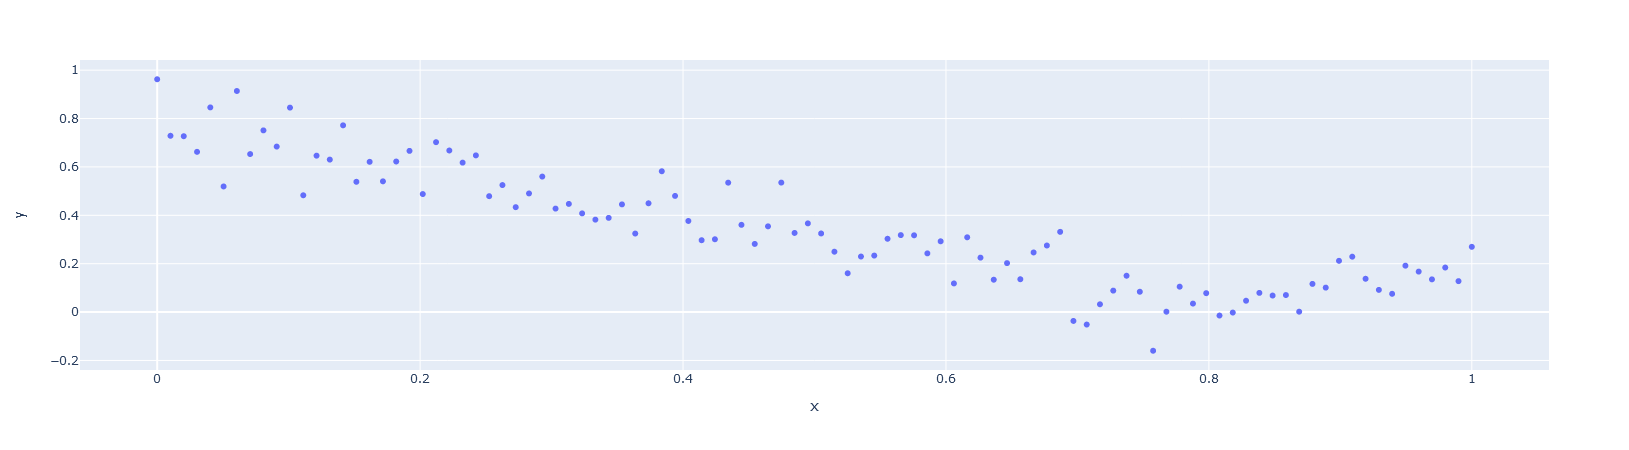

In [14]:
np.random.seed(1)
x = np.linspace(0,1,100)
xtest = np.linspace(0,1,1000)
y =  np.abs(x-0.8) + np.random.normal(scale=0.1, size=len(x))
px.scatter(x=x, y=y)

In [21]:
m = (("s(1)", "dec", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [22]:
mdec = (("s(1)", "dec", 20, (0.01, 6000), "equidistant"),)
Mdec = StarModel(description=mdec).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [18]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypreddec = Mdec.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 1) > 0.0001
cc_constr = np.diff(ypreddec, 1) > 0.0001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.318
Percentage of predictions that violate the constraint for constraint fit: 	 0.0


## **CONCAVE EXAMPLE**

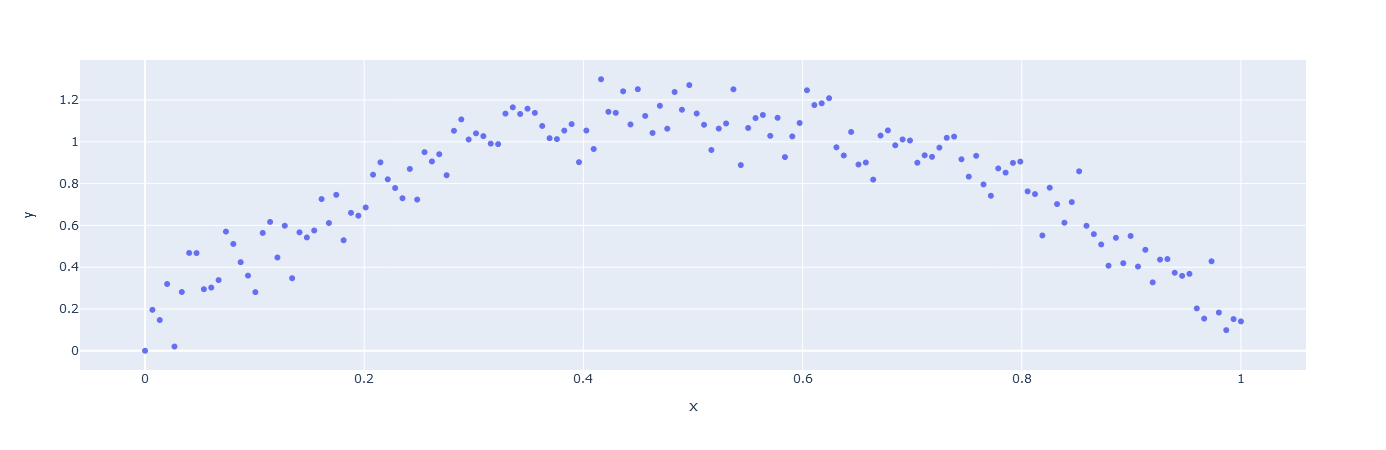

In [3]:
xx = np.linspace(-1,1,150)
yc = xx**2 + np.random.normal(scale=0.1, size=len(xx))
yconcave = -1*yc + abs(min(-1*yc))
x = (xx - xx.min()) / (xx.max() - xx.min())
xtest = np.linspace(0,1,1000)
px.scatter(x=x, y=yconcave)

In [73]:
m = (("s(1)", "conc", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=yconcave, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [74]:
mconc = (("s(1)", "conc", 20, (0.01, 60000), "equidistant"),)
Mconc = StarModel(description=mconc).fit(X=x.reshape(-1,1), y=yconcave, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [75]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypredconc = Mconc.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 2) > 0.00000001
cc_constr = np.diff(ypredconc, 2) > 0.00000001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.482
Percentage of predictions that violate the constraint for constraint fit: 	 0.076


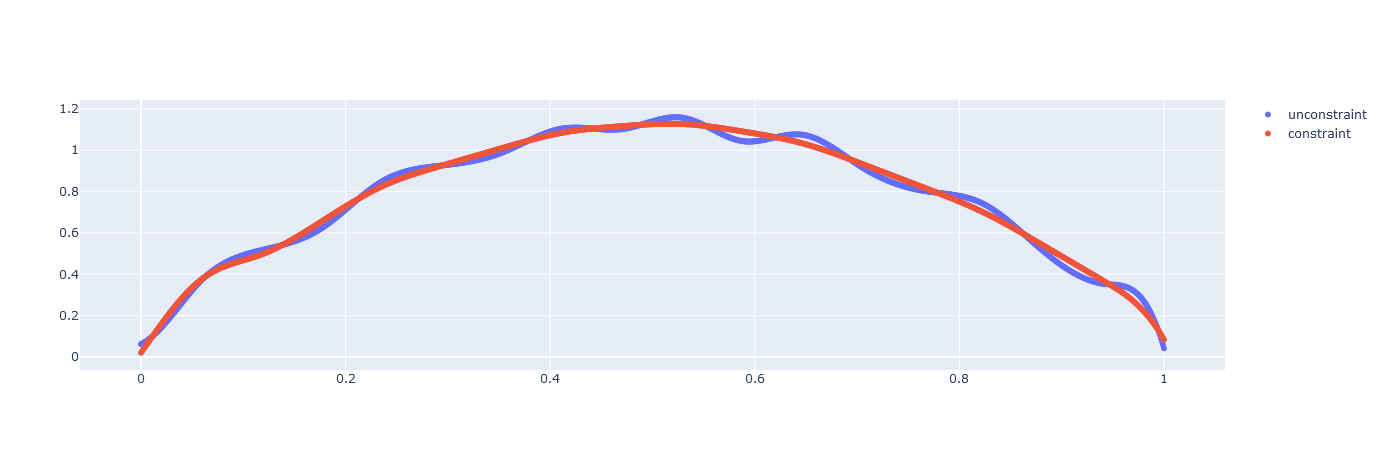

In [76]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=xtest, y=ypred, name="unconstraint", mode="markers"))
fig.add_trace(go.Scatter(x=xtest, y=ypredconc, name="constraint", mode="markers"))


## **CONVEX EXAMPLE**

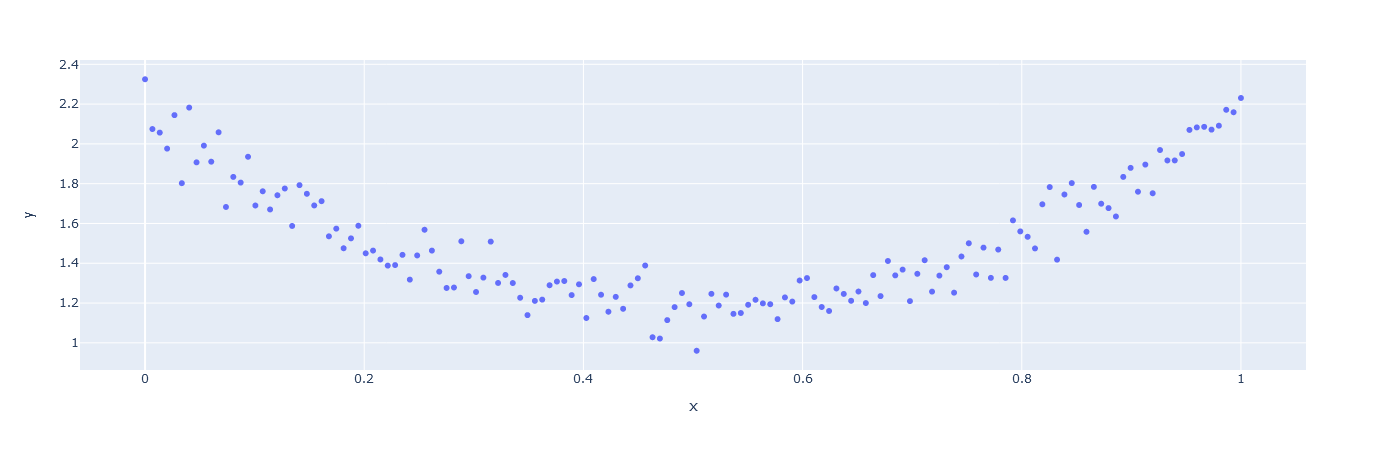

In [80]:
np.random.seed(1)
xx = np.linspace(-1,1,150)
yc = xx**2 + np.random.normal(scale=0.1, size=len(xx))
yconvex = yc + abs(min(-1*yc))
x = (xx - xx.min()) / (xx.max() - xx.min())
xtest = np.linspace(0,1,1000)
px.scatter(x=x, y=yconvex)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


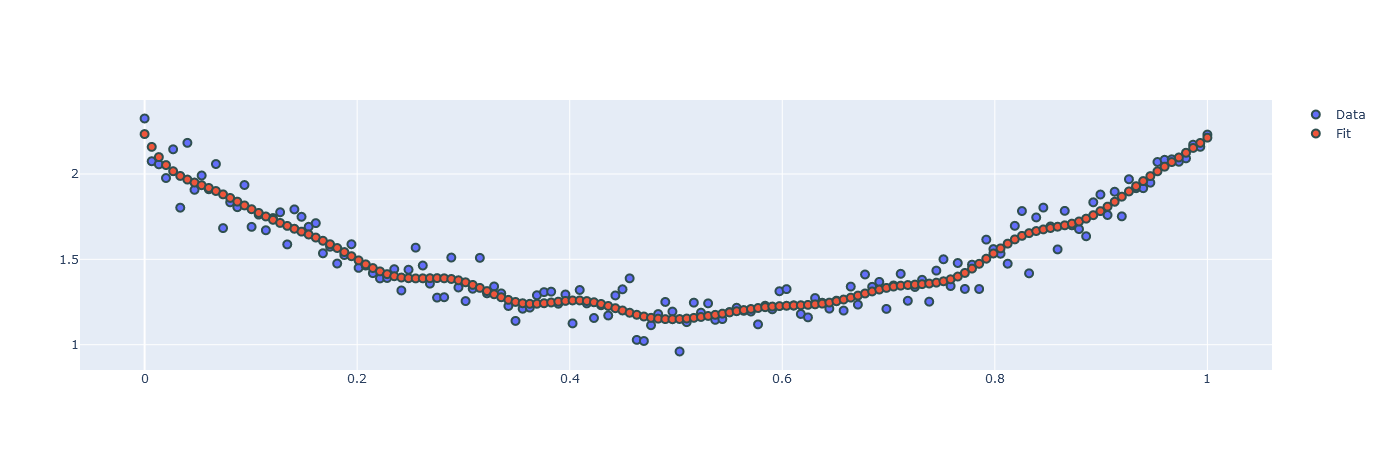

Violated Constraints: 8 from 20 


In [81]:
m = (("s(1)", "conv", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=yconvex, plot_=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


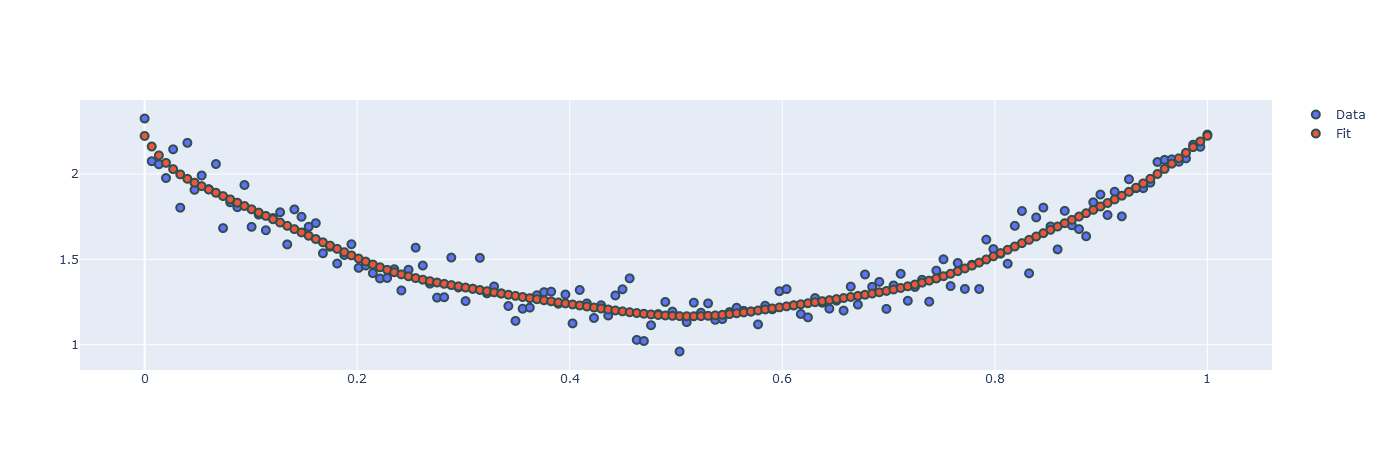

Violated Constraints: 8 from 20 


In [82]:
mconv = (("s(1)", "conv", 20, (0.01, 60000), "equidistant"),)
Mconv = StarModel(description=mconv).fit(X=x.reshape(-1,1), y=yconvex, plot_=1)

In [83]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypredconv = Mconv.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 2) > 0.00000001
cc_constr = np.diff(ypredconc, 2) > 0.00000001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.579
Percentage of predictions that violate the constraint for constraint fit: 	 0.076


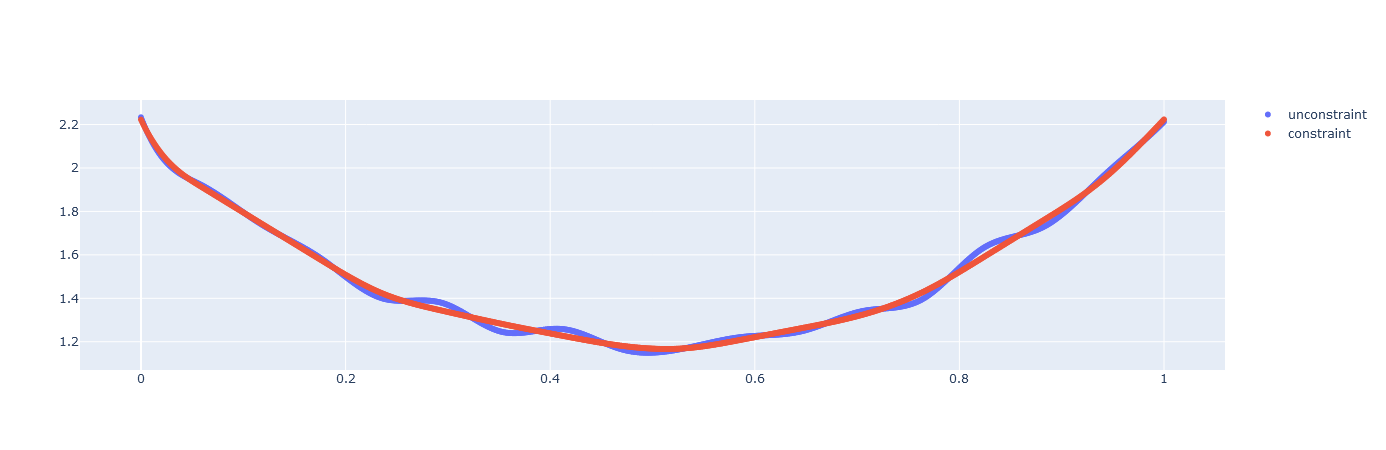

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=xtest, y=ypred, name="unconstraint", mode="markers"))
fig.add_trace(go.Scatter(x=xtest, y=ypredconv, name="constraint", mode="markers"))


## **PEAK EXAMPLE**

In [10]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from stareg.star_model import StarModel

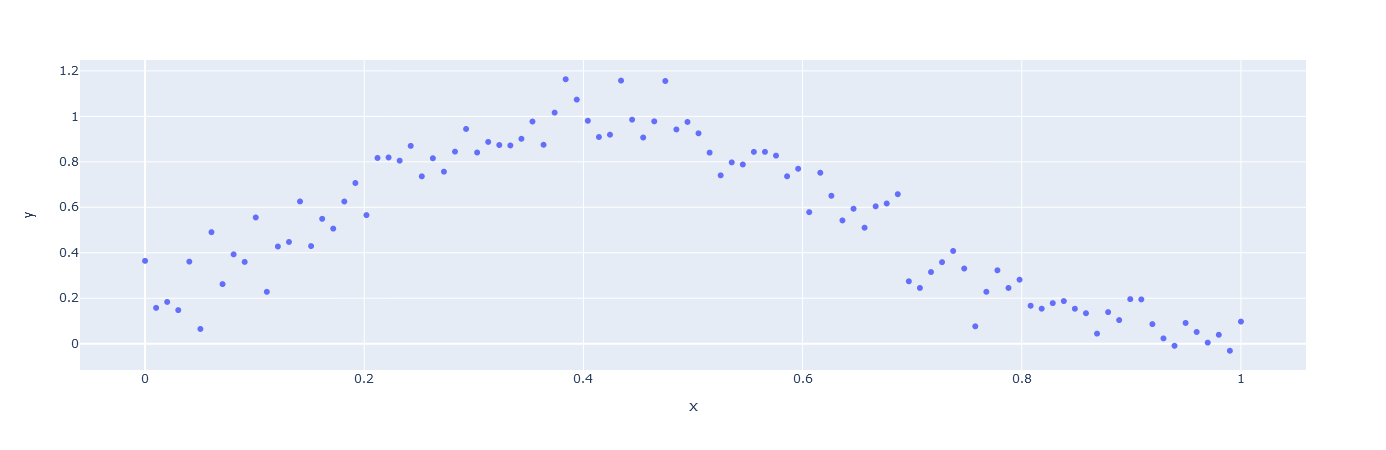

In [11]:
np.random.seed(1)
x = np.linspace(0,1,100)
ypeak = np.exp(-(x-0.4)**2/0.1) + np.random.normal(scale=0.1, size=len(x)) #+ 0.5*x**1.2
xtest = np.linspace(0,1,1000)
px.scatter(x=x, y=ypeak)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


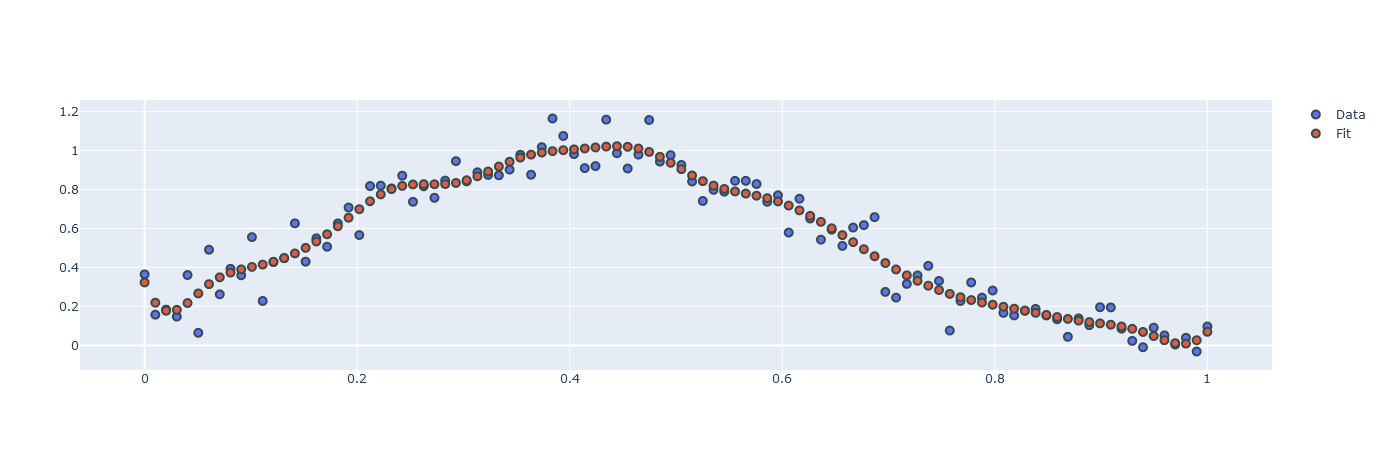

Violated Constraints: 3 from 20 


In [12]:
m = (("s(1)", "peak", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=ypeak, plot_=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


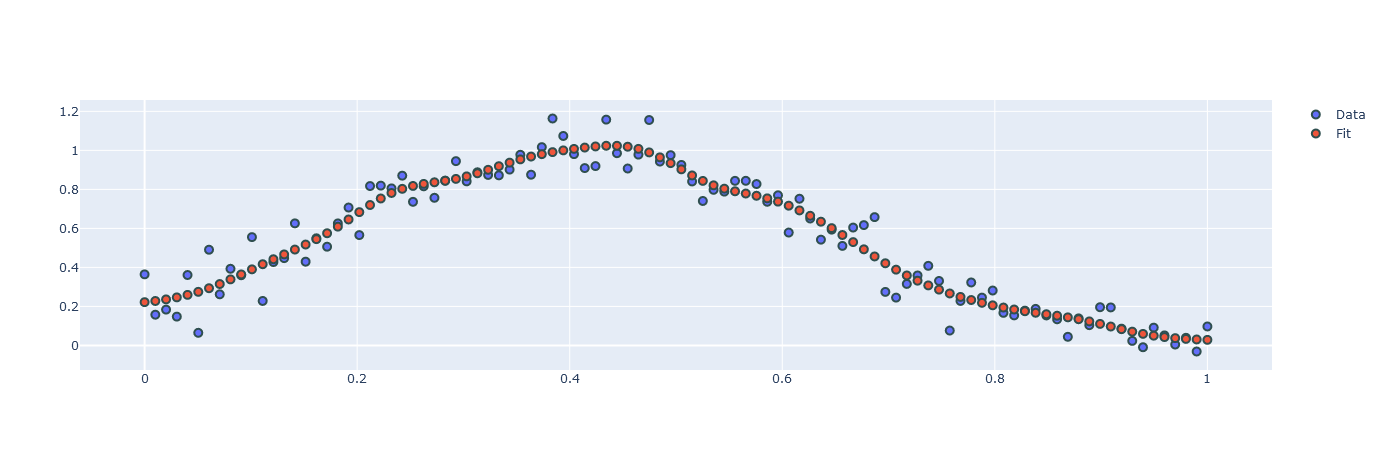

Violated Constraints: 3 from 20 


In [13]:
mpeak = (("s(1)", "peak", 20, (0.01, 6000), "equidistant"),)
Mpeak = StarModel(description=mpeak).fit(X=x.reshape(-1,1), y=ypeak, plot_=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


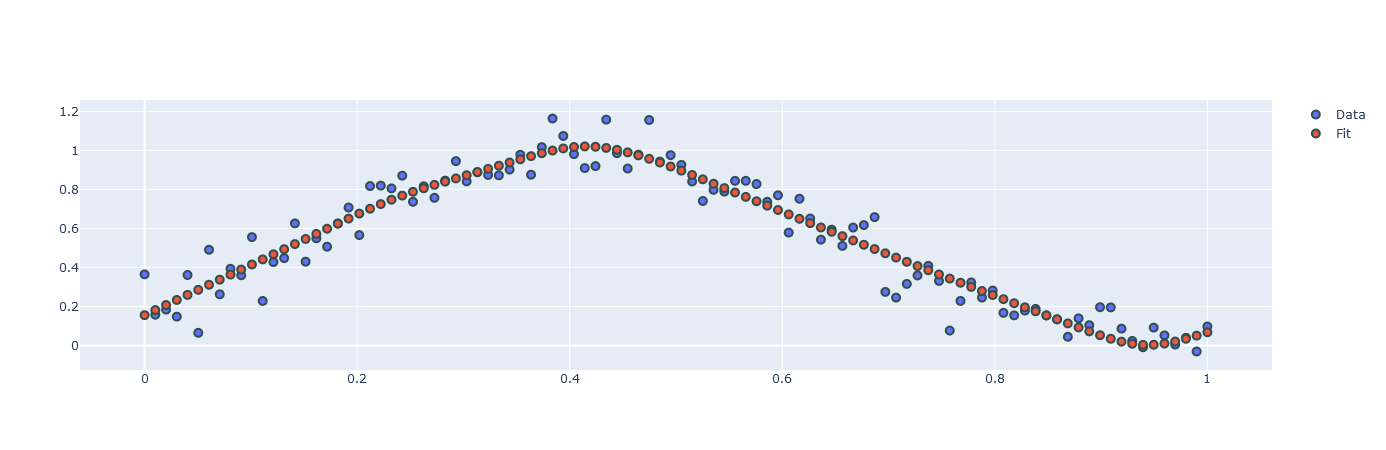

Violated Constraints: 14 from 20 


In [14]:
mpeakconc = (("s(1)", "conc", 20, (0.01, 6000), "equidistant"),)
Mpeakconc = StarModel(description=mpeakconc).fit(X=x.reshape(-1,1), y=ypeak, plot_=1)

In [15]:
from stareg.utils import check_constraint_peak

ypred = M.predict(X=xtest.reshape(-1,1))
ypredpeak = Mpeak.predict(X=xtest.reshape(-1,1))
ypredpeakconc = Mpeakconc.predict(X=xtest.reshape(-1,1))

cc = check_constraint_peak(ypred)
cc_constr = check_constraint_peak(ypredpeak)
cc_constr_ = check_constraint_peak(ypredpeakconc)

print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit using peak constraint: \t", round(sum(cc_constr) / len(cc_constr), 9))
print("Percentage of predictions that violate the constraint for constraint fit using concav constraint: \t", round(sum(cc_constr_) / len(cc_constr_), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.061
Percentage of predictions that violate the constraint for constraint fit using peak constraint: 	 0.0
Percentage of predictions that violate the constraint for constraint fit using concav constraint: 	 0.056


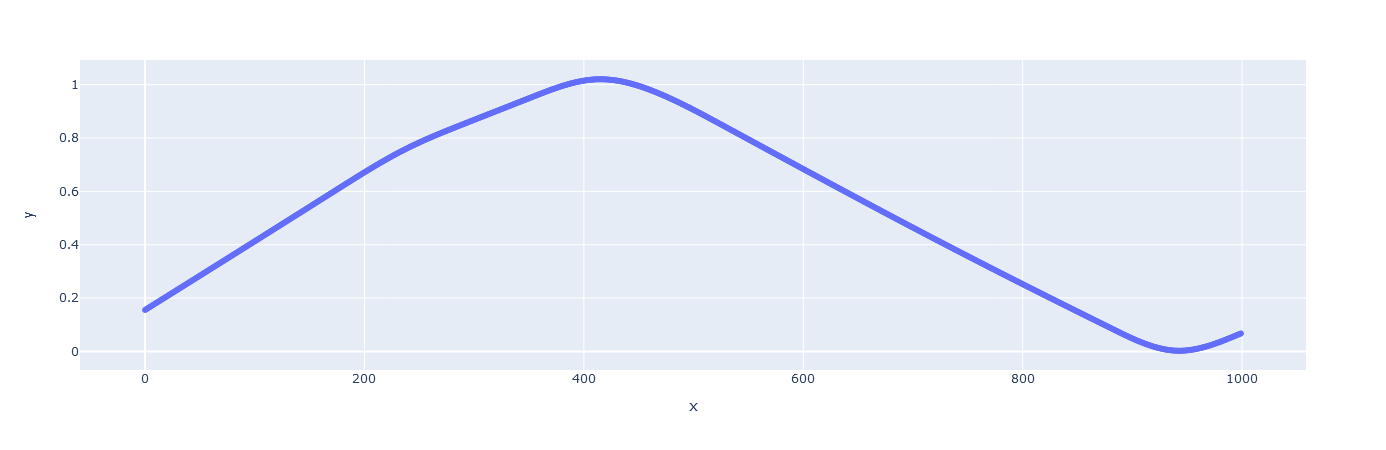

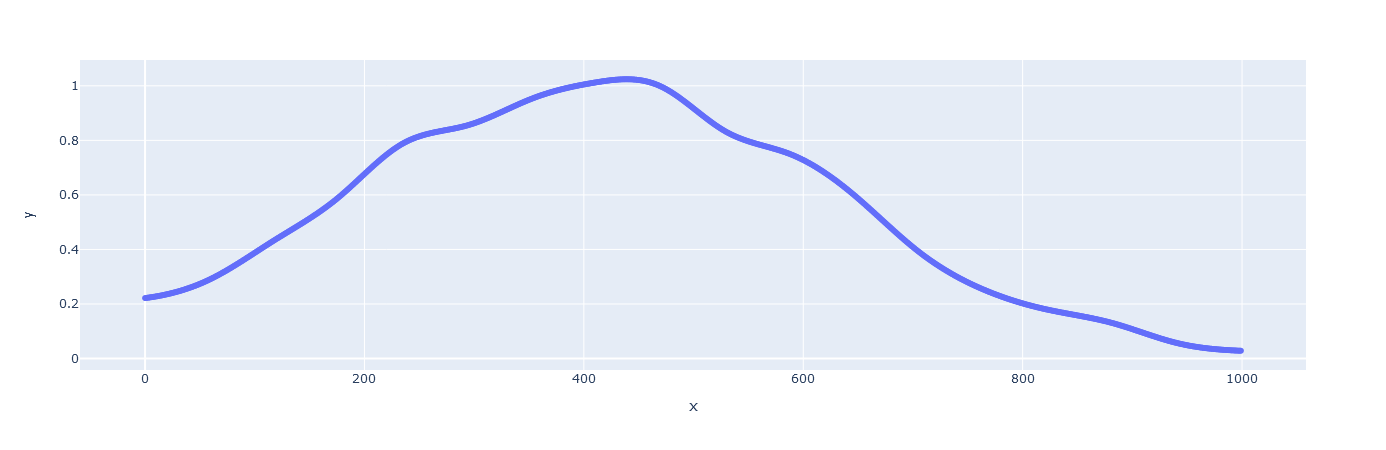

In [16]:
px.scatter(y=ypredpeakconc).show()
px.scatter(y=ypredpeak).show()

## **2D Example**

In [1]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from stareg.star_model import StarModel

In [15]:
n = 25
x1, x2 = np.linspace(0,1,n), np.linspace(0,1,n)
x1g, x2g = np.meshgrid(x1, x2)
X = np.vstack((x1g.ravel(), x2g.ravel())).T
def f(x1, x2):
    return 1.2*np.exp(-((x1 - 0.5)**2/0.05) - ((x2 - 0.5)**2/0.05)) + x1*x2 + np.random.normal(loc=0.0, scale=0.01, size=x1.shape)
y = f(X[:,0], X[:,1])
df = {"x1":X[:,0], "x2":X[:,1], "y":y}


In [16]:
m = ( ("s(1)", "peak", 20, (1, 1000), "equidistant"),
       ("s(2)", "peak", 20, (1, 1000), "equidistant"),
       ("t(1,2)", "smooth", (10, 10), (1, 1000), "equidistant"),)

In [17]:
M = StarModel(description=m)
M.fit(X=X, y=y, plot_=0, verbose=True, max_iter=5)

--- Constraint NOT FINISHED ---
Penalty smooth not implemented!


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
Constraint:  peak
Constraint:  peak
Constraint:  smooth
----Iteration 1-----
-----v_old = 11-----
-----v_new = 6------ 

Constraint:  peak
Constraint:  peak
Constraint:  smooth
----Iteration 2-----
-----v_old = 6------
-----v_new = 6------ 

--PIRLS converged!--


StarModel(s(1)={'constraint': 'peak', 'knot_type': 'equidistant',
                'lam': {'constraint': 1000, 'smoothness': 1}, 'n_param': 20},
          s(2)={'constraint': 'peak', 'knot_type': 'equidistant',
                'lam': {'constraint': 1000, 'smoothness': 1}, 'n_param': 20},
          t(1,2)={'constraint': 'smooth', 'knot_type': 'equidistant',
                  'lam': {'constraint': 1000, 'smoothness': 1},
                  'n_param': (10, 10)})

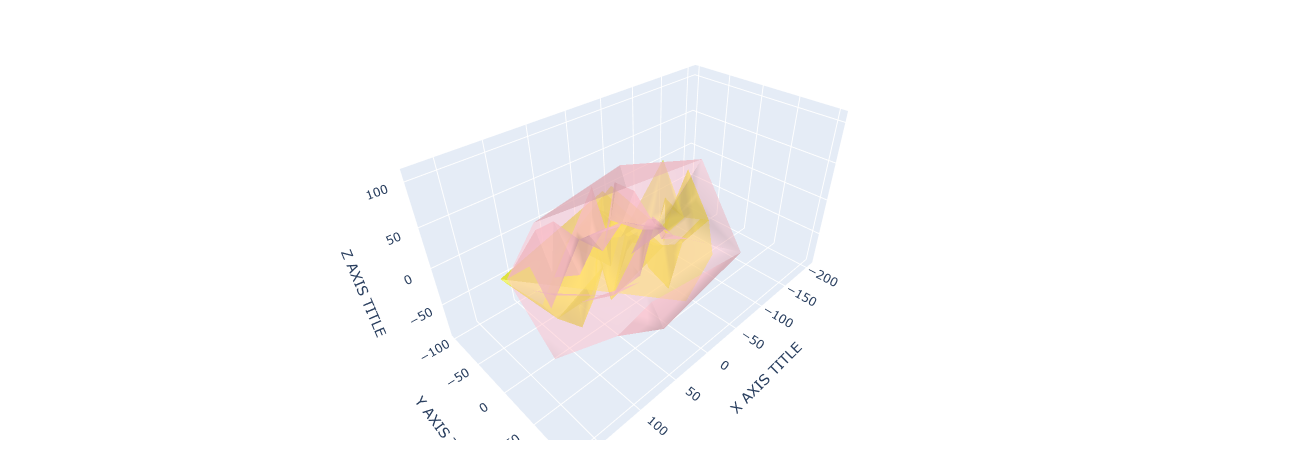

In [32]:
# Define random surface
N = 50
fig = go.Figure()
fig.add_trace(go.Mesh3d(x=(60*np.random.randn(N)),
                   y=(25*np.random.randn(N)),
                   z=(40*np.random.randn(N)),
                   opacity=0.5,
                   color='yellow'
                  ))
fig.add_trace(go.Mesh3d(x=(70*np.random.randn(N)),
                   y=(55*np.random.randn(N)),
                   z=(30*np.random.randn(N)),
                   opacity=0.5,
                   color='pink'
                  ))

fig.update_layout(scene = dict(
                    xaxis_title='X AXIS TITLE',
                    yaxis_title='Y AXIS TITLE',
                    zaxis_title='Z AXIS TITLE'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

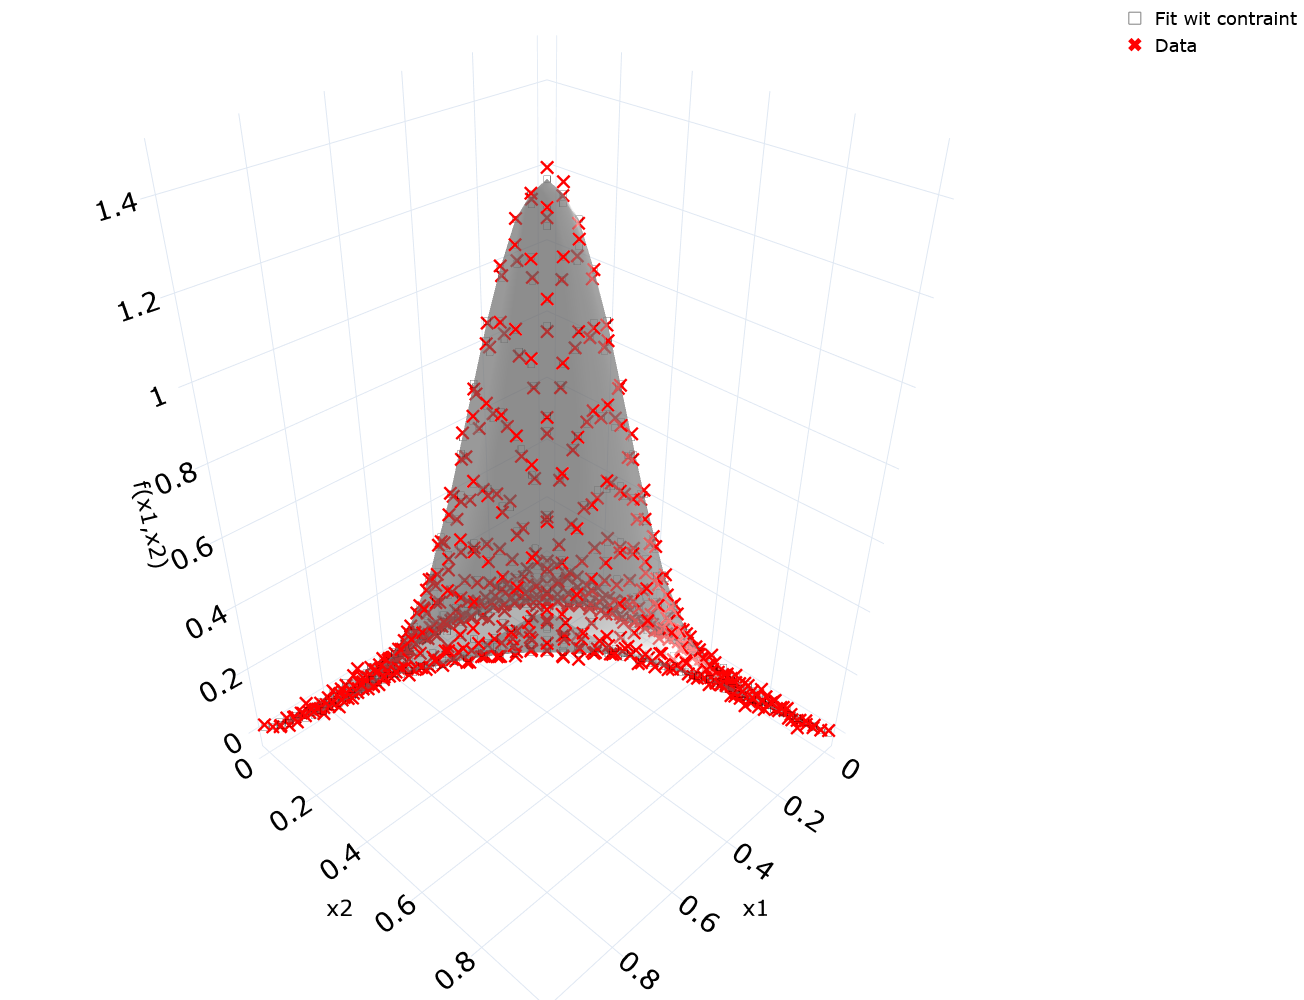

In [44]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=M.basis @ M.coef_, mode="markers", marker=dict(size=4, color="black", symbol="square-open"), 
                           name="Fit wit contraint", surfaceaxis=2, surfacecolor="grey", opacity=0.5))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y, mode="markers", name="Data",
                          marker=dict(size=4, color="red", symbol="x")))



fig.layout.template = "plotly_white"
fig.update_layout(scene=dict(xaxis_title='x1', yaxis_title="x2", zaxis_title="f(x1,x2)"),
                  margin=dict(l=1, r=0, b=0.2, t=0), 
                  height=1000,
                  width=900,
                  font=dict(size=18,color="black"))
fig.layout.legend.itemsizing = "constant"
fig.show()

In [46]:
# plot individual parts
z_s1 = M.smooths["s(1)"].basis @ M.smooths["s(1)"].coef_
z_s2 = M.smooths["s(2)"].basis @ M.smooths["s(2)"].coef_
z_t12 = M.smooths["t(1,2)"].basis @ M.smooths["t(1,2)"].coef_

In [ ]:
np.unique

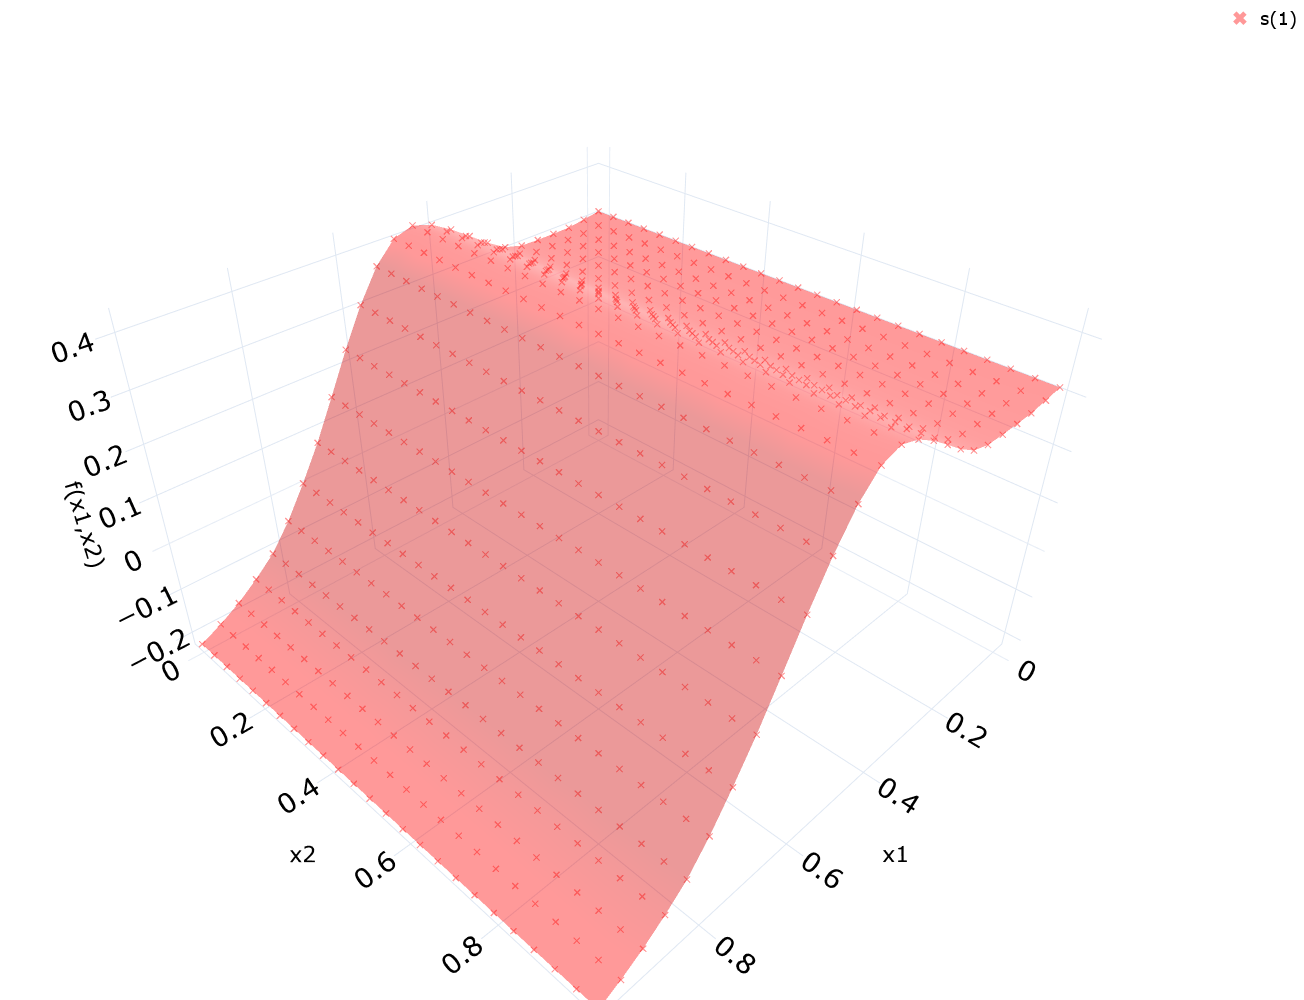

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=z_s1, mode="markers", marker=dict(size=2, color="red", symbol="x"),
                           name="s(1)", showlegend=True, surfaceaxis=2, surfacecolor="red", opacity=0.4))

fig.layout.template = "plotly_white"
fig.update_layout(scene=dict(xaxis_title='x1', yaxis_title="x2", zaxis_title="s(1)"),
                  margin=dict(l=1, r=0, b=0.2, t=0), 
                  height=1000,
                  width=900,
                  font=dict(size=18,color="black"))
fig.layout.legend.itemsizing = "constant"
fig.show()

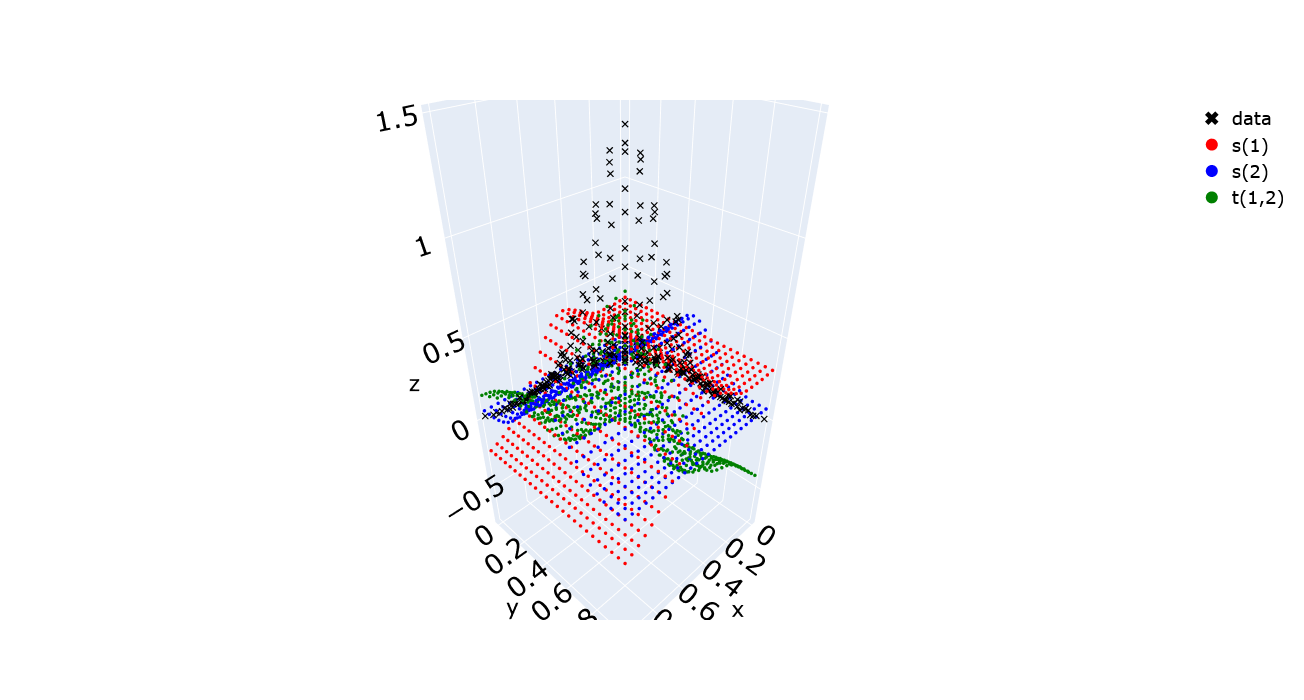

In [46]:
fig = go.Figure()
#fig.add_trace(go.Surface(x=xgrid, y=ygrid, z=zgrid))
fig.add_trace(go.Scatter3d(x=X[:,0][::2], y=X[:,1][::2], z=y[::2], mode="markers", marker=dict(size=2, color="black", symbol="x"), name="data"))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=z_s1, mode="markers", marker=dict(size=2, color="red"), name="s(1)"))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=z_s2, mode="markers", marker=dict(size=2, color="blue"), name="s(2)"))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=z_t12, mode="markers", marker=dict(size=2, color="green"), name="t(1,2)"))

fig.update_layout(xaxis_title="x1",
                  yaxis_title="x2",
                  font=dict(size=18,color="black"))
fig.layout.legend.itemsizing = "constant"
fig.update_layout(height=700, width=1000)
#fig.write_html("img/Fit_partition.html")
fig.show()